<a href="https://colab.research.google.com/github/parkrye/Python/blob/main/202101_KNUBootCamp/SearchData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 설치

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# 실행부

## 데이터 읽기

In [ ]:
path = '/content/geoMap.csv'
data = pd.read_csv(path)

In [ ]:
# NA => 0
data.fillna(0, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 국가 to 왈리스-푸투나 제도
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   카테고리: 모든 카테고리  251 non-null    object
dtypes: object(1)
memory usage: 12.0+ KB


In [ ]:
data.describe()

,카테고리: 모든 카테고리
count,251
unique,33
top,0
freq,182


In [ ]:
data.head(5)

,카테고리: 모든 카테고리
국가,BTS: (21. 2. 11.~22. 2. 11.)
에리트리아,0
스리랑카,100
미얀마,100
부탄,0


## 데이터 정리

In [ ]:
nation = list(data.index[1:])                 # 국가 이름
search = list(map(int, data.iloc[1:].values)) # 국가별 검색량(0 ~ 100)
print(nation)
print(search)

['에리트리아', '스리랑카', '미얀마', '부탄', '필리핀', '몰디브', '일본', '방글라데시', '마요트', '코트디부아르', '피지', '인도네시아', '투르크메니스탄', '네팔', '쿠바', '페루', '미크로네시아', '엘살바도르', '볼리비아', '레위니옹', '말레이시아', '과들루프', '모리셔스', '브루나이', '키리바시', '온두라스', '과테말라', '니카라과', '몽골', '사모아', '파라과이', '프랑스령 기아나', '벨리즈', '인도', '마르티니크', '멕시코', '태국', '파키스탄', '싱가포르', '코모로', '괌', '프랑스령 폴리네시아', '에콰도르', '가이아나', '뉴칼레도니아', '이라크', '솔로몬 제도', '생마르탱', '캄보디아', '동티모르', '파나마', '그린란드', '지부티', '콜롬비아', '서사하라', '트리니다드 토바고', '튀니지', '프랑스', '코스타리카', '적도 기니', '아랍에미리트', '아르메니아', '오만', '베트남', '모로코', '마다가스카르', '가봉', '북마리아나제도', '생바르텔레미', '바레인', '수리남', '아메리칸 사모아', '타지키스탄', '우즈베키스탄', '카타르', '소말리아', '푸에르토리코', '칠레', '아제르바이잔', '알바니아', '그레나다', '키르기스스탄', '리비아', '쿠웨이트', '콩고-브라자빌', '알제리', '카메룬', '도미니카 공화국', '레바논', '조지아', '홍콩', '대만', '베네수엘라', '에티오피아', '자메이카', '라오스', '세네갈', '토고', '요르단', '아르헨티나', '세인트루시아', '브라질', '대한민국', '카보베르데', '이집트', '팔레스타인', '짐바브웨', '보츠와나', '생피에르 미클롱', '카자흐스탄', '남아프리카', '세이셸', '시리아', '모리타니', '코소보', '니제르', '말라위', '몰도바', '세인트빈센트그레나딘', '사우디아라비아', '앙골라', '터키', '파푸아뉴기니

In [ ]:
nations = []                        # 검색량이 0이 아닌 국가들
nations_zero = []                   # 검색량이 0인 국가들
for i in range(250):
  if(search[i] == 0):
    nations_zero.append(nation[i])
  else:
    nations.append(nation[i])
  
searchs = []                        # 검색량이 0이 아닌 국가들의 검색량
for i in range(250):
  if(search[i] != 0):
    searchs.append(search[i])

In [ ]:
print(len(nations), nations)
print(len(searchs), searchs)
print(len(nations_zero), nations_zero)

68 ['스리랑카', '미얀마', '필리핀', '일본', '방글라데시', '코트디부아르', '인도네시아', '네팔', '페루', '엘살바도르', '볼리비아', '말레이시아', '온두라스', '과테말라', '파라과이', '인도', '멕시코', '태국', '파키스탄', '싱가포르', '에콰도르', '이라크', '파나마', '콜롬비아', '튀니지', '프랑스', '코스타리카', '아랍에미리트', '베트남', '모로코', '우즈베키스탄', '칠레', '알제리', '도미니카 공화국', '홍콩', '대만', '베네수엘라', '아르헨티나', '브라질', '대한민국', '이집트', '카자흐스탄', '남아프리카', '사우디아라비아', '터키', '미국', '캐나다', '나이지리아', '이란', '뉴질랜드', '오스트레일리아', '포르투갈', '루마니아', '헝가리', '벨기에', '덴마크', '영국', '그리스', '독일', '오스트리아', '스웨덴', '폴란드', '스페인', '이탈리아', '스위스', '러시아', '네덜란드', '우크라이나']
68 [100, 100, 73, 68, 63, 59, 55, 54, 48, 45, 45, 43, 41, 40, 37, 36, 34, 33, 33, 31, 30, 30, 26, 23, 23, 23, 22, 22, 22, 22, 19, 19, 16, 16, 16, 16, 15, 15, 13, 13, 13, 12, 12, 11, 11, 11, 11, 9, 9, 9, 9, 8, 8, 8, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5]
182 ['에리트리아', '부탄', '몰디브', '마요트', '피지', '투르크메니스탄', '쿠바', '미크로네시아', '레위니옹', '과들루프', '모리셔스', '브루나이', '키리바시', '니카라과', '몽골', '사모아', '프랑스령 기아나', '벨리즈', '마르티니크', '코모로', '괌', '프랑스령 폴리네시아', '가이아나', '뉴칼레도니아', '솔로몬 제도', '생마르탱

In [ ]:
sep_nations = []                      # 68개의 데이터를 17 * 4 개로 구분
for i in range(0, 68, 17):
  sep_nations.append(nations[i:i+17])

sep_searchs = []                      # 68개의 데이터를 17 * 4 개로 구분
for i in range(0, 68, 17):
  sep_searchs.append(searchs[i:i+17])

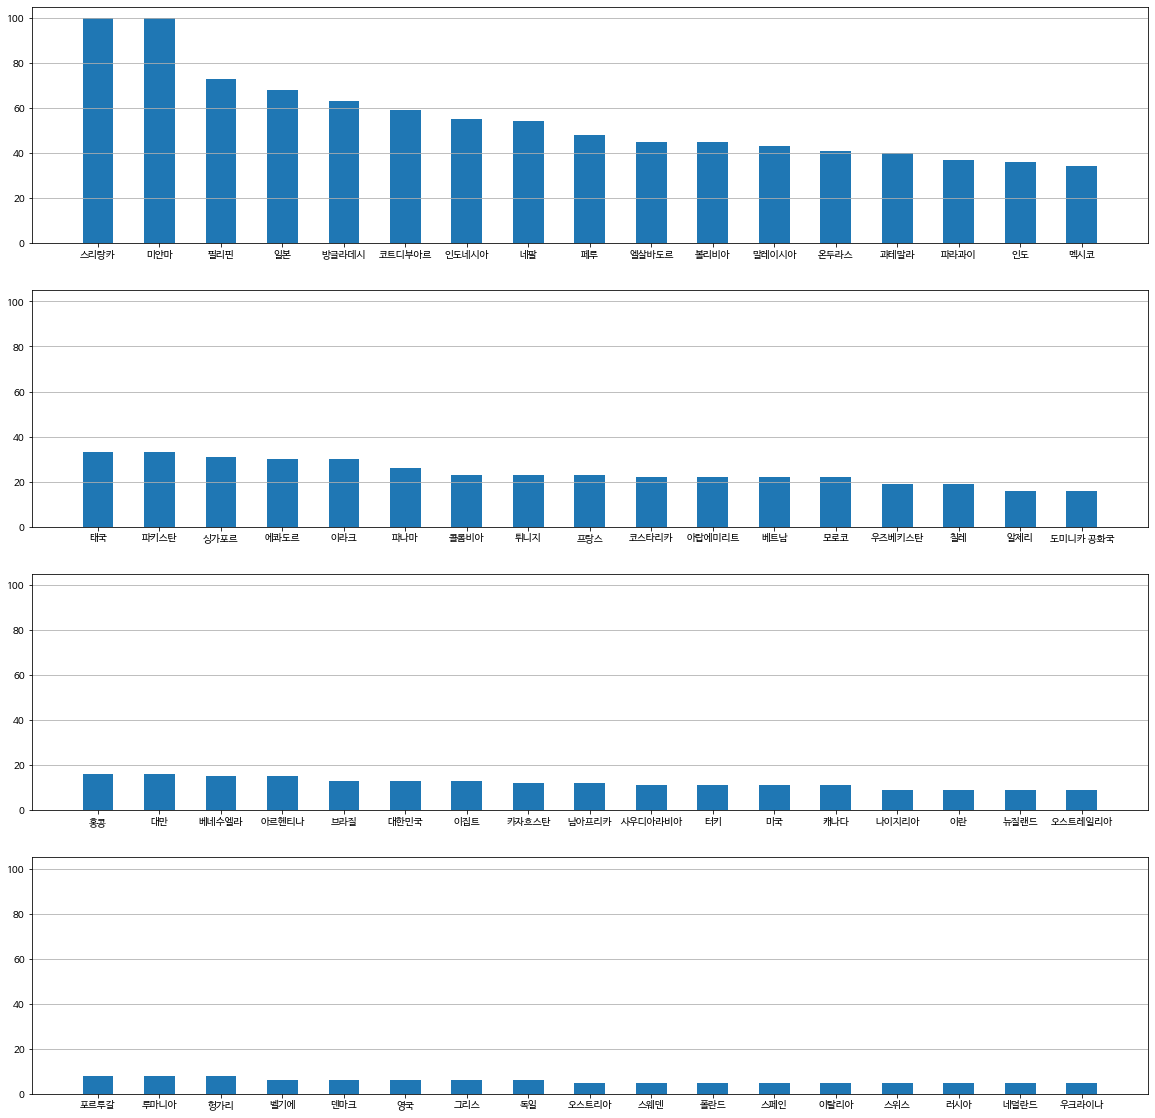

In [ ]:
plt.figure(figsize = (20, 20))
    
count = 0
for i in range(4):
  plt.subplot(4, 1, (count+1))
  plt.ylim(0, 105)
  plt.grid(axis = 'y')
  plt.bar(sep_nations[count], sep_searchs[count], width = 0.5)
  count += 1

plt.show()